In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [49]:
dataset=pd.read_csv("salary.csv")
dataset.head(8)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manger,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,220000


In [16]:
print(dataset.columns)


Index(['Position', 'Level ', 'Salary'], dtype='object')


In [17]:
dataset.columns = dataset.columns.str.strip()


In [23]:
# dataset.corr()
dataset_numeric = dataset.select_dtypes(include=['float64', 'int64'])
print(dataset_numeric.corr())


          Level   Salary
Level   1.00000  0.72064
Salary  0.72064  1.00000


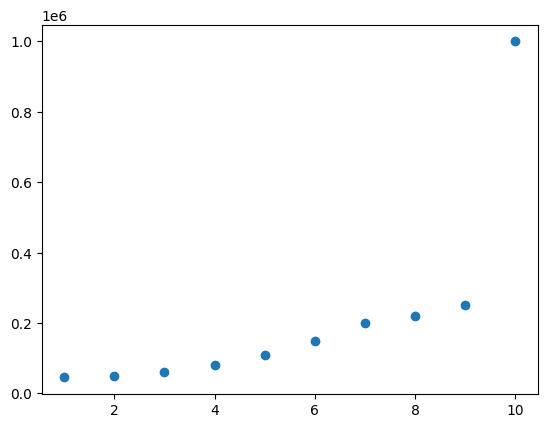

In [20]:
plt.scatter(dataset["Level"],dataset["Salary"])
plt.show()

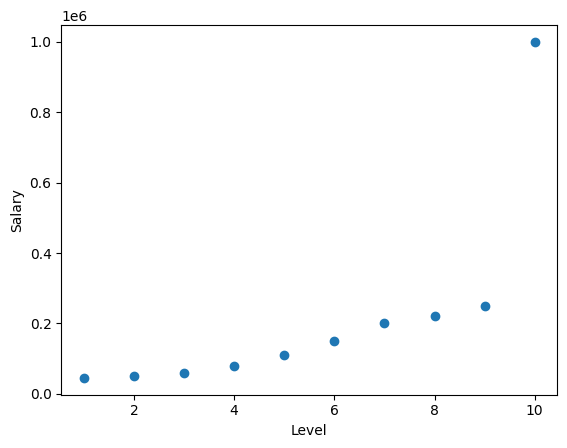

In [25]:
plt.scatter(dataset["Level"],dataset["Salary"])
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

In [26]:
x=dataset[["Level"]]
y=dataset["Salary"]

In [27]:
from sklearn.preprocessing import PolynomialFeatures

In [30]:
pf=PolynomialFeatures(degree=2)
pf.fit(x)

,degree,2
,interaction_only,False
,include_bias,True
,order,'C'


In [32]:
x=pf.transform(x)

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [34]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [35]:
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [41]:
lr.score(x_test,y_test)*100

96.0266977917634

In [ ]:
# y=m1*x1+m2-x2^2+c

In [45]:
lr.coef_

array([      0.        , -142886.16449972,   20665.98360656])

In [46]:
lr.intercept_

np.float64(244024.5195025443)

In [42]:
prd=lr.predict(x)

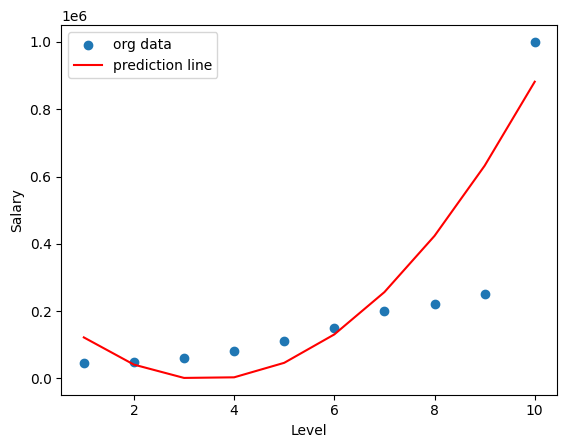

In [44]:
plt.scatter(dataset["Level"],dataset["Salary"])
plt.plot(dataset["Level"],prd,c="red")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.legend(["org data","prediction line"])
plt.show()

In [50]:
# for test the model
test=pf.transform([[3]])
test

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[1., 3., 9.]])

In [51]:
lr.predict(test)

array([1359.87846241])